In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline

In [63]:
titanic = pd.read_csv("/Users/jerife/data/titanic/train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
titanic.shape

(891, 12)

In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

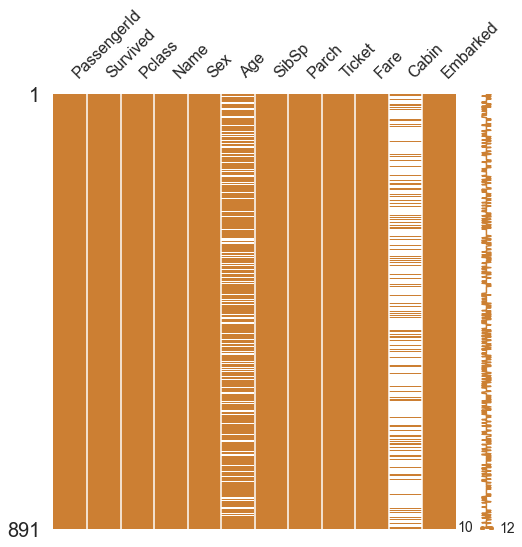

In [66]:
msno.matrix(df=titanic.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))


<AxesSubplot:>

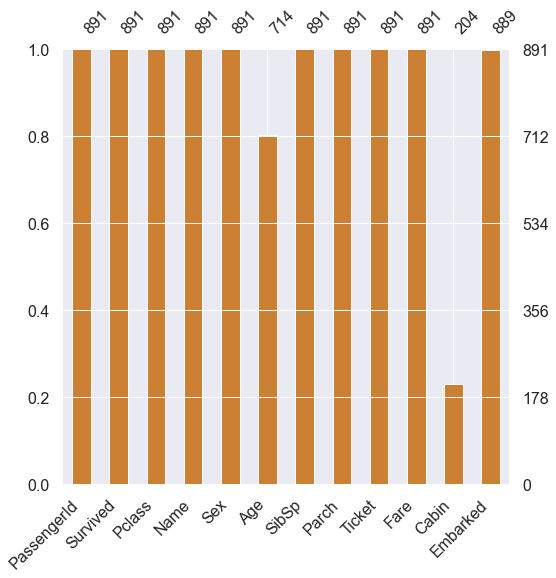

In [67]:
msno.bar(df=titanic.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


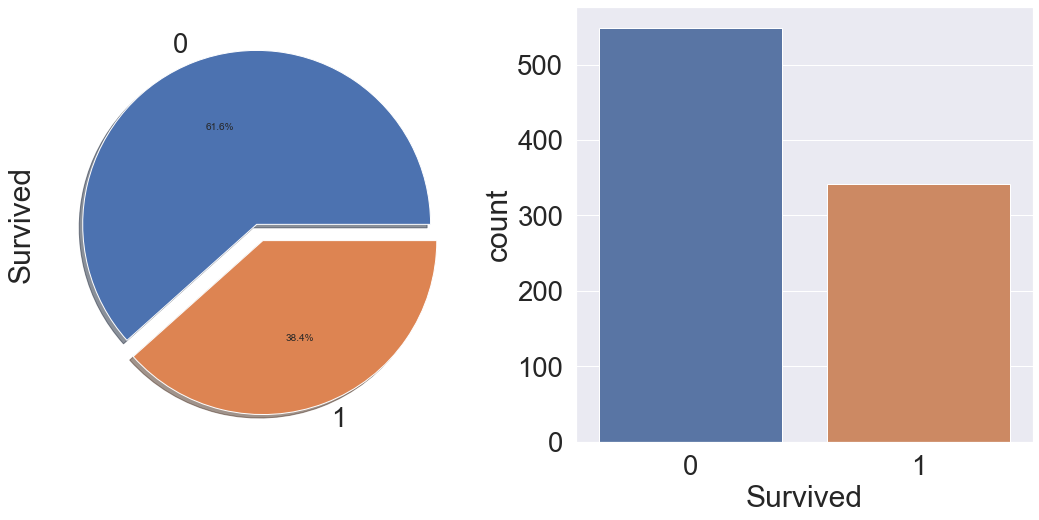

In [68]:
f,ax=plt.subplots(1,2,figsize=(18,8))

titanic['Survived'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)
sns.countplot('Survived',data=titanic,ax=ax[1])

plt.show()

In [69]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Cabin'] = titanic['Cabin'].fillna("N")
titanic['Embarked'] = titanic['Embarked'].fillna("N")

In [70]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [72]:
titanic[['Pclass','Survived']].groupby(['Survived'],as_index=True).count()

,Pclass
Survived,
0,549
1,342


In [73]:
pd.crosstab(titanic['Pclass'],titanic['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

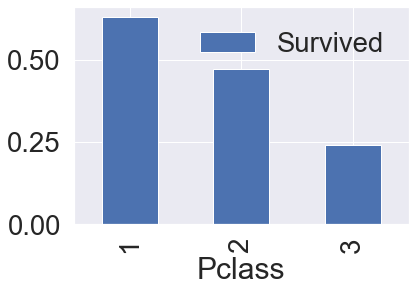

In [74]:
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


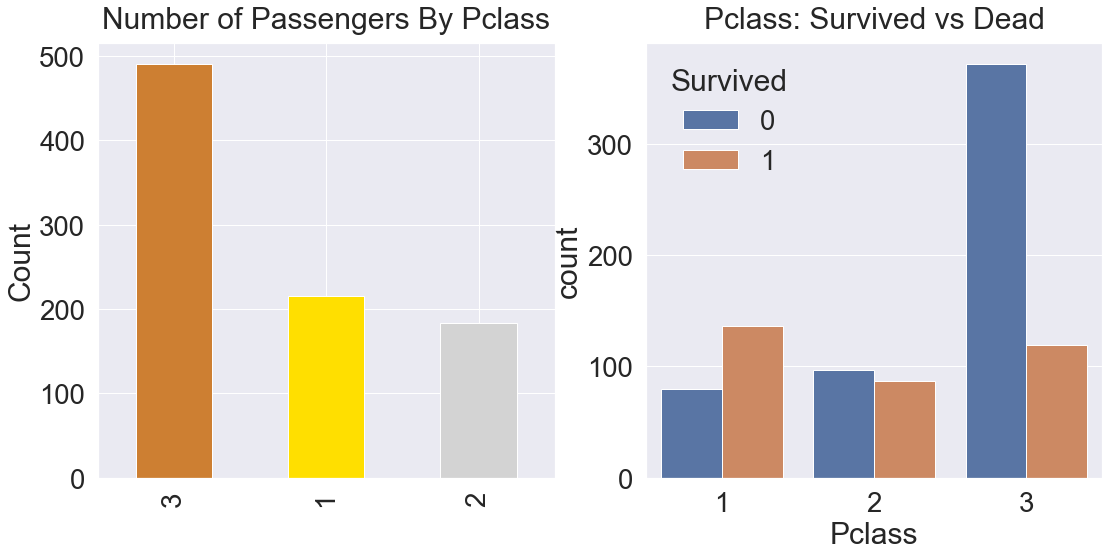

In [91]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

In [99]:
pd.crosstab(titanic['Sex'],titanic['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


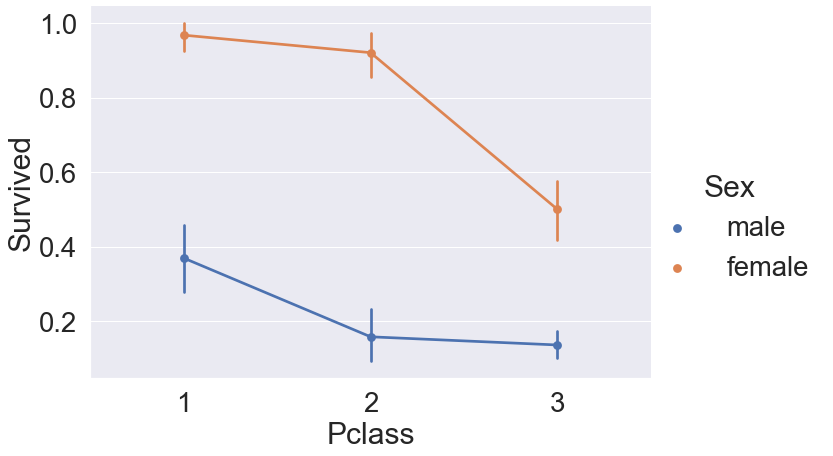

In [101]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic,size=6,aspect=1.5)

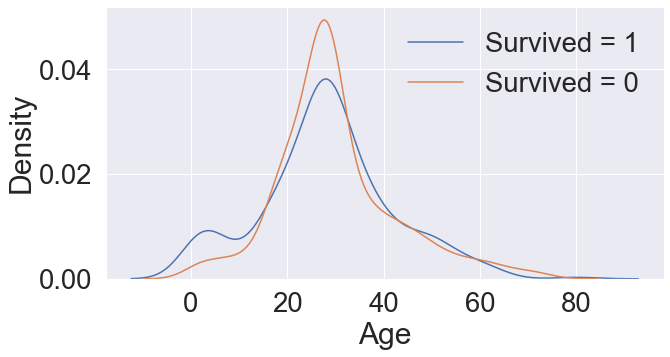

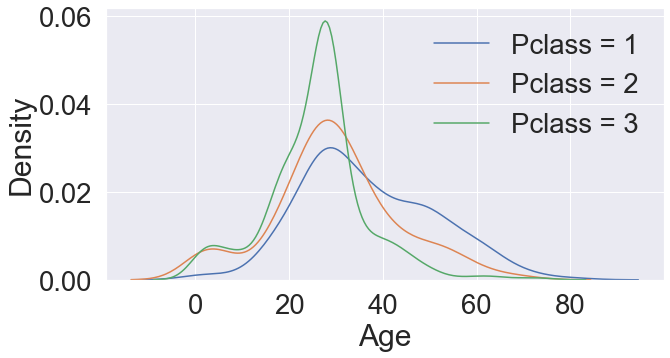

In [110]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(titanic[titanic['Survived']==1]['Age'],ax=ax)
sns.kdeplot(titanic[titanic['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived = 1','Survived = 0'])
plt.show()
#%
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(titanic[titanic['Pclass']==1]['Age'],ax=ax)
sns.kdeplot(titanic[titanic['Pclass']==2]['Age'],ax=ax)
sns.kdeplot(titanic[titanic['Pclass']==3]['Age'],ax=ax)
plt.legend(['Pclass = 1','Pclass = 2','Pclass = 3'])
plt.show()

In [ ]:
plt.boxplot(titanic['Fare'])

In [46]:
titanic.drop(titanic[titanic['Fare']>400].index,inplace=True)

In [47]:
titanic.shape

(888, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfb3925990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfb392d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcfb3883990>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfb392db10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfb392df10>],
 'means': []}

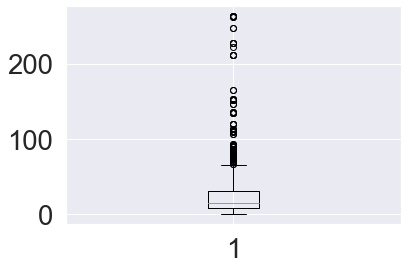

In [48]:
plt.boxplot(titanic['Fare'])

In [49]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
titanic.drop(['Name','PassengerId','Parch','Ticket'],axis=1,inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,0,3,male,22.0,1,7.2500,N,S
1,1,1,female,38.0,1,71.2833,C85,C
2,1,3,female,26.0,0,7.9250,N,S
3,1,1,female,35.0,1,53.1000,C123,S
4,0,3,male,35.0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,N,S
887,1,1,female,19.0,0,30.0000,B42,S
888,0,3,female,28.0,1,23.4500,N,S
889,1,1,male,26.0,0,30.0000,C148,C


In [51]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,0,3,male,22.0,1,7.2500,N,S
1,1,1,female,38.0,1,71.2833,C,C
2,1,3,female,26.0,0,7.9250,N,S
3,1,1,female,35.0,1,53.1000,C,S
4,0,3,male,35.0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,N,S
887,1,1,female,19.0,0,30.0000,B,S
888,0,3,female,28.0,1,23.4500,N,S
889,1,1,male,26.0,0,30.0000,C,C


In [52]:
titanic = pd.get_dummies(titanic)
titanic

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,38.0,1,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,1,35.0,1,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,1,19.0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,0,3,28.0,1,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,1,26.0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [53]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [55]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
pred = log_reg.predict(x_test)
print("모델 정확도 측정 : ", accuracy_score(pred,y_test))


모델 정확도 측정 :  0.8063063063063063


/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print("모델 정확도 측정 : ", accuracy_score(pred,y_test))

모델 정확도 측정 :  0.7972972972972973


In [57]:
param = {'max_depth':[2,4,6,8],
         'min_samples_split':[2,3,5],
         'min_samples_leaf':[1,3,5]
        }
grid = GridSearchCV(dtree,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [58]:
grid.best_score_

0.8221164222687742

In [59]:
grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [60]:
score = cross_val_score(dtree,x,y,scoring='accuracy',cv=5)
score.mean()

0.7950612581730464

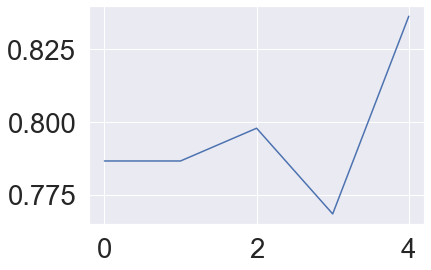

In [61]:
plt.plot(score)